In [3]:
import pandas as pd
import math
from glob import glob
def getDataFromDay(day):
    dataframes = []
    for f in glob(day+"/*.json"):
        dataframes.append(pd.read_json(f,lines=True))
    dataDay = pd.concat(dataframes)
    return(dataDay)
def extractUserData(data):
    captured_keys = ['friends_count','favourites_count', 'description','screen_name', 'geo_enabled', 'lang', 'verified','time_zone','statuses_count', 'followers_count', 'following', 'name', 'location','created_at']
    users = set()
    userData = {}
    for key in captured_keys:
        userData[key] = []
    for ind,val in data.iterrows():
        if val['user']['name'] not in users:
            users.add(val['user']['name'])
            for key in captured_keys:
                userData[key].append(val['user'][key])
    userFrame = pd.DataFrame()
    for key in userData.keys():
        print(key,len(userData[key]))
        userFrame[key] = userData[key]
    return userFrame

def getRetweetData(data_1):
    user_dict = {}
    follower_dict = {}
    account_creation_dict = {}
    location_dict = {}
    hashtag_dict = {}
    #if statement, to count of often a user is retweeted in the user_dict
    for retweeted in data_1['retweeted_status']:
        if retweeted['user']['name'] in user_dict.keys():
            user_dict[retweeted['user']['name']] += 1
        else:
            user_dict[retweeted['user']['name']] = 1 #also get the user's follower_count, created date, location, and used hasgtags
            follower_dict[retweeted['user']['name']] = retweeted['user']['followers_count']
            account_creation_dict[retweeted['user']['name']] = retweeted['user']['created_at']
            location_dict[retweeted['user']['name']] = retweeted['user']['location']
            hashtag_dict[retweeted['user']['name']] = retweeted['entities']['hashtags']


    retweet_data = pd.DataFrame()
    retweet_data['user'] = list(user_dict.keys())
    retweet_data['retweeted'] = list(user_dict.values())
    retweet_data['followers_count'] = list(follower_dict.values())
    retweet_data['created_at'] = list(account_creation_dict.values())
    retweet_data['location'] = list(location_dict.values())
    retweet_data['hastags'] = list(hashtag_dict.values())
    return retweet_data

location_dict = {'UK': 'United Kingdom', 'USA': 'United States', 'London': 'London, England', 'London ': 'London, England', ' London': 'London, England', 'London, UK': 'London, England', 'England': 'England, United Kingdom', 'Manchester': 'Manchester, England', 'London, England': 'London, England', 'United Kingdom': 'United Kingdom', 'England, United Kingdom': 'England, United Kingdom', 'Manchester, England': 'Manchester, England', 'United States': 'United States', 'Scotland': 'Scotland, United Kingdom', 'Liverpool': 'Liverpool, England', 'Paris': 'Paris, France', 'France': 'France', 'Edinburgh': 'Edinburgh, Scotland', 'Glasgow': 'Glasgow, Scotland', 'Glasgow, Scotland': 'Glasgow, Scotland', 'Washington, DC': 'Washington, United States', 'Brussels': 'Brussels, Belgium', 'london': 'London, England', 'New York, NY': 'New York, United States', 'Edinburgh, Scotland': 'Edinburgh, Scotland', 'Bristol': 'Bristol, England', 'Ireland': 'Ireland', 'Birmingham, England': 'Birmingham, England', 'Leeds': 'Leeds, England', 'Berlin': 'Berlin, Germany', 'Sheffield': 'Sheffield, England', 'Europe': 'Europe', 'Scotland, United Kingdom': 'Scotland, United Kingdom', 'Madrid': 'Madrid, Spain', 'London, United Kingdom': 'London, England', 'Nottingham': 'Nottingham, England', 'Liverpool, England': 'Liverpool, England', 'Birmingham': 'Birmingham, England', 'Paris, France': 'Paris, France', 'Brussels, Belgium': 'Brussels, Belgium', 'Manchester, UK': 'Manchester, England', 'Cardiff': 'Cardiff, Wales', 'Bristol, England': 'Bristol, England', 'New York': 'New York, United States', 'Leeds, England': 'Leeds, England', 'Essex': 'Essex, England', 'North West, England': 'North West, England', 'South East, England': 'South East, England', 'Dublin': 'Dublin, Ireland', 'Germany': 'Germany', 'Australia': 'Australia', 'Earth': 'Earth', 'Belfast': 'Belfast, North Ireland', 'India': 'India', 'Sheffield, England': 'Sheffield, England', 'Canada': 'Canada', 'Brighton': 'Brighton, England', 'Global': 'Earth', 'Worldwide': 'Earth', 'Wales, United Kingdom': 'Wales, United Kingdom', 'Cardiff, Wales': 'Cardiff, Wales', 'South West, England': 'South West, England', 'Wales': 'Wales, United Kingdom', 'Birmingham, UK': 'Birmingham, England', 'Dublin, Ireland': 'Dublin, Ireland', 'Oxford': 'Oxford, England', 'Amsterdam': 'Amsterdam, Netherlands', 'Nottingham, England': 'Nottingham, England', 'uk': 'United Kingdom', 'Northern Ireland': 'Northern Ireland', 'Yorkshire': 'Yorkshire, England', 'London UK': 'London, England', 'España': 'Spain', 'Los Angeles, CA': 'Los Angeles, United States', 'Singapore': 'Singapore', 'Belfast, Northern Ireland': 'Belfast, Northern Ireland', 'Newcastle Upon Tyne, England': 'Newcastle Upon Tyne, England', 'Cambridge, England': 'Cambridge, England', 'Bristol, UK': 'Bristol, England', 'Brighton, England': 'Brighton, England', 'Kent': 'Kent, England', 'Berlin, Germany': 'Berlin, Germany', 'Cambridge': 'Cambridge, England', 'Barcelona': 'Barcelona, Spain', 'Cambridge, UK': 'Cambridge, England', 'California, USA': 'California, United States', 'Paris, Ile-de-France': 'Paris, France', 'West Midlands, England': 'West Midlands, England', 'México': 'Mexico', 'New York, USA': 'New York, United States', 'Everywhere': 'Earth', 'Nederland': 'Netherlands', 'Leicester': 'Leicester, England', 'Southampton': 'Southampton, England', 'Hong Kong': 'Hong Kong, China', 'Oxford, England': 'Oxford, England', 'New York City': 'New York, United States', 'Surrey': 'Surrey, England', 'Norwich': 'Norwich, England', 'Dublin City, Ireland': 'Dublin, Ireland', 'North East, England': 'North East, England', 'Netherlands': 'Netherlands', 'York': 'York, England', 'Leicester, England': 'Leicester, England', 'Italy': 'Italy', 'Deutschland': 'Germany', 'Planet Earth': 'Earth', 'Italia': 'Italy', 'Norwich, England': 'Norwich, England', 'Roma': 'Rome, Italy', 'Cheshire': 'Cheshire, England', 'Chicago, IL': 'Chicago, United States', 'Toronto': 'Toronto, Canada', 'Thailand': 'Thailand', 'Spain': 'Spain', 'Boston, MA': 'Boston, United States', 'Newcastle upon Tyne': 'Newcastle upon Tyne, England', 'The Netherlands': 'Netherlands', 'Southampton, England': 'Southampton, England', 'Florida, USA': 'Florida, United States', 'Washington, D.C.': 'Washington, United States', 'Newcastle': 'Newcastle, England', 'Sweden': 'Sweden', 'Sydney': 'Sydney, Australia', 'South Africa': 'South Africa', 'San Francisco, CA': 'San Francisco, United States', 'Cornwall': 'Cornwall, England', 'Mumbai': 'Mumbai, India', 'NYC': 'New York, United States', 'Stockholm': 'Stockholm, Sweden', 'East Midlands, England': 'East Midlands, England', 'Athens, Greece': 'Athens, Greece', 'Texas, USA': 'Texas, United States', 'Texas': 'Texas, United States', 'Belgium': 'Belgium', 'UK ': 'United Kingdom', 'Toronto, Ontario': 'Toronto, Canada', 'Brooklyn, NY': 'New York, United States', 'Berlin, Deutschland': 'Berlin, Germany', 'Lancashire': 'Lancashire, England', 'Sydney, Australia': 'Sydney, Australia', 'South London': 'London, England', 'Los Angeles': 'Los Angeles, United States', 'Hogwarts': 'England', 'Sheffield, UK': 'Sheffield, England', 'Hertfordshire': 'Hertfordshire, England', 'Oxford, UK': 'Oxford, England', 'Aberdeen': 'Aberdeen, Scotland', 'Greece': 'Greece', 'City of London, London': 'London, England', 'LONDON': 'London, England', 'Liverpool, UK': 'Liverpool, England', 'Gibraltar': 'Gibraltar', 'York, England': 'York, England', 'Leeds, UK': 'Leeds, England', 'Chicago': 'Chicago, United States', 'LDN': 'London, England', 'Finland': 'Finland', 'South Wales': 'Wales', 'Brighton, UK': 'Brighton, England', 'Milano': 'Milan, Italy', 'Plymouth': 'Plymouth, England', 'Portsmouth': 'Portsmouth, England', 'West Yorkshire': 'West Yorkshire, England', 'Nairobi, Kenya': 'Nairobi, Kenya', 'Great Britain': 'United Kingdom', 'Melbourne, Australia': 'Melbourne, Australia', 'Bath': 'Bath, England', 'East, England': 'East, England', 'Aberdeen, Scotland': 'Aberdeen, Scotland', 'Derby': 'Derby, England', 'Athens': 'Athens, Greece', 'Melbourne': 'Melbourne, Australia', 'Bruxelles': 'Brussels, Belgium', 'Washington DC': 'Washington, United States', 'manchester': 'Manchester, England', 'Devon': 'Devon, England', 'Brasil': 'Brasil', 'Manchester ': 'Manchester, England', 'Coventry': 'Coventry, England', 'Copenhagen': 'Copenhagen, Denmark', 'Hamburg': 'Hamburg, Germany', 'North London': 'London, England', 'Nottingham, UK': 'Nottingham, England', 'New Delhi, India': 'New Delhi, India', 'Reading, England': 'Reading, England', 'Helsinki, Finland': 'Helsinki, Finland', 'Bath, England': 'Bath, England', 'Hackney, London': 'London, England', 'Swansea': 'Swansea, Wales', 'liverpool': 'Liverpool, England', 'Oxfordshire': 'Oxfordshire, England', 'North Wales': 'Wales', 'Dubai': 'Dubai, United Arab Emirates', 'Lagos, Nigeria': 'Lagos, Nigeria', 'Stockholm, Sweden': 'Stockholm, Sweden', 'Mumbai, India': 'Mumbai, India', 'Mexico': 'Mexico', 'Derbyshire': 'Derbyshire, England', 'Polska': 'Poland', 'Hull, England': 'Hull, England', 'Somerset': 'Somerset, England', 'Switzerland': 'Switzerland', 'Roma, Lazio': 'Rome, Italy', 'Hampshire': 'Hampshire, England', 'Madrid, Spain': 'Madrid, Spain', 'Reading': 'Reading, England', 'Austin, TX': 'Austin, United States', 'Florida': 'Florida, United States', 'england': 'England', 'Swansea, Wales': 'Swansea, Wales', 'New Delhi': 'New Delhi, India', 'East London': 'London, England', 'Madrid, España': 'Madrid, Spain', 'Madrid, Comunidad de Madrid': 'Madrid, Spain', 'Bournemouth': 'Bournemouth, England', 'California': 'California, United States', 'Johannesburg, South Africa': 'Johannesburg, South Africa', 'Coventry, England': 'Coventry, England', 'Melbourne, Victoria': 'Melbourne, Australia', 'Suffolk': 'Suffolk, England', 'Portsmouth, England': 'Portsmouth, England', 'Birmingham UK': 'Birmingham, England', 'Sussex': 'Sussex, England', 'Sydney, New South Wales': 'Sydney, Australia', 'Houston, TX': 'Houston, United States', 'Toronto, Canada': 'Toronto, Canada', 'West Midlands': 'West Midlands, England', 'Chile': 'Chile', 'Derby, England': 'Derby, England', 'Poland': 'Poland', 'San Francisco': 'San Francisco, United States', 'Denmark': 'Denmark', 'Milton Keynes': 'Milton Keynes, England', 'Helsinki': 'Helsinki, Finland', 'England ': 'England', 'San Diego, CA': 'San Diego, United States', 'Warsaw, Poland': 'Warsaw, Poland', 'York, UK': 'York, England', 'Dubai, United Arab Emirates': 'Dubai, United Arab Emirates', 'West Sussex': 'West Sussex, England', 'Exeter': 'Exeter, England', 'Plymouth, England': 'Plymouth, England', 'Atlanta, GA': 'Atlanta, United States', 'Japan': 'Japan', 'Malaysia': 'Malaysia', 'Vienna, Austria': 'Vienna, Austria', 'Kent, UK': 'Kent, England', 'Portugal': 'Portugal', 'Sunderland': 'Sunderland, England', 'Staffordshire': 'Staffordshire, England', 'Manchester UK': 'Manchester, England', 'Nigeria': 'Nigeria', 'Seattle, WA': 'Seattle, United States', 'sheffield': 'Sheffield, England', 'Bangkok, Thailand': 'Bangkok, Thailand', 'Preston': 'Preston, England', 'Bath, UK': 'Bath, England', 'Stoke-on-Trent, England': 'Stoke-on-Trent, England', 'Durham, England': 'Durham, England', 'Northampton, England': 'Northampton, England'}

def replace_locations(data):
    for k,v in location_dict.items():
        data['location'].replace(k,v,inplace=True)
    return data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import codecs
data = pd.read_csv(codecs.open('2016-06-21_userdata.csv', encoding = 'utf-8', errors ='replace'), engine='python')#Data From 6-21

In [53]:
only_location_data = data[pd.notnull(data['location'])]
replace_locations(only_location_data)
locations = only_location_data['location'].value_counts()
df_locations = pd.DataFrame(locations)
sig_locations = df_locations[df_locations['location'] > 50]
without_earth = sig_locations[sig_locations.index != 'Earth']
without_europe = without_earth[without_earth.index != 'Europe']

/Users/Finn/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [54]:
import geopy,gmaps
from geopy.geocoders import Nominatim
import os
geolocator = Nominatim()
#location_data = {}
for location in without_europe.index:
    geocode = None
    if location not in location_data.keys():
        try :
            geocode = geolocator.geocode(location)
            print("Location found ",(geocode.latitude, geocode.longitude),"for",location)
            location_data[location] = (geocode.latitude, geocode.longitude)
        except Exception as e:
            print("Location not found, or timed out for",location, "Error:",e)

In [55]:
positions = []
for location in data['location']:
    if location in location_data.keys():
        positions.append(location_data[location])
    else:
        positions.append("")
data['position'] = positions

In [56]:
sig_users = only_location_data[only_location_data['location'].isin(without_europe.index)]
#sig_users.to_csv("2016-06-21_userdata_sig.csv")
#Lets make only one dot per 50 people (rounding up from 75)
sig_data = sig_users
wohle_data = data

In [57]:
location_counts = sig_data[sig_data['location'].isin(without_europe.index)]['location'].value_counts()

In [64]:
#Data Structure for the vizualization:
#We need: location/age of account to be correctly distributed, other data doesn't matter
#Most used hastags is gonna be hardcoded, so is most influental people 
user_sample = []
replace_locations(wohle_data)
for location,count in location_counts.items():
    to_keep = math.ceil(count  / 100)
    signficant = wohle_data[wohle_data['location'] == location][:to_keep]
    signficant['bogus'] = False
    user_sample.append(signficant)
#Add the users without a location
no_location = wohle_data[pd.isnull(wohle_data['location'])]
to_keep = math.ceil(no_location.shape[0] / 200)
no_location['bogus'] = False
user_sample.append(no_location[:to_keep])
#Add the users with the bogus locations
bogus_people = wohle_data[-wohle_data['location'].isin(without_europe.index)]
to_keep = math.ceil(bogus_people.shape[0] / 200)
bogus_people['bogus'] = True
user_sample.append(bogus_people[:to_keep])

/Users/Finn/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Finn/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [59]:
data_sample = pd.concat(user_sample)

In [60]:
import numpy as np
from datetime import datetime,timedelta
dates = []
data_sample = data_sample[pd.notnull(data_sample['created_at'])]
for date in data_sample['created_at']:
    dates.append(datetime(2016,6,21,23,59,59) - (datetime.strptime(date, '%a %b %d %H:%M:%S +0000 %Y')))
ages = durations = [h.total_seconds() for h in dates]
data_sample['age'] = ages

In [61]:
#data = pd.read_csv('2017-09-23_final.csv')
for k,v in data_sample.iterrows():
    if(v['location'] == "United Kingdom"):
        data_sample.set_value(k,'position','(51.5073219, -0.1276474)')
data_sample.to_csv('pre_brexit_data.csv')

In [62]:
data_sample.drop('name', axis=1, inplace=True)
data_sample.drop('Unnamed: 0', axis=1, inplace=True)
data_sample.drop('friends_count', axis=1, inplace=True)
data_sample.drop('favourites_count', axis=1, inplace=True)
data_sample.drop('description', axis=1, inplace=True)
data_sample.drop('geo_enabled', axis=1, inplace=True)
data_sample.drop('lang', axis=1, inplace=True)
data_sample.drop('verified', axis=1, inplace=True)
data_sample.drop('time_zone', axis=1, inplace=True)
data_sample.drop('statuses_count', axis=1, inplace=True)
data_sample.drop('followers_count', axis=1, inplace=True)
data_sample.drop('following', axis=1, inplace=True)
data_sample.drop('created_at', axis=1, inplace=True)
data_sample.drop('retweeted_count', axis=1, inplace=True)
#data_sample.to_csv('during_brexit_data_small.csv')

In [63]:
data_sample.drop_duplicates('screen_name').to_csv('pre_brexit_data_small.csv')

In [1]:
import pandas as pd
from datetime import datetime
data = pd.read_csv(open('2017-09-23_userdata.csv','rU'), encoding='utf-8', engine='c')
fdata = data.sort_values(by="retweeted_count",ascending=False)[:10]
dates = []
for date in fdata['created_at']:
    dates.append(datetime(2017,9,23,23,59,59) - (datetime.strptime(date, '%a %b %d %H:%M:%S +0000 %Y')))
ages = [h.total_seconds() for h in dates]
fdata['age'] = ages

/Users/Finn/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 'U' mode is deprecated
  app.launch_new_instance()
/Users/Finn/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,5,7,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
fdata.drop_duplicates('screen_name').to_csv('most_retweeted_post.csv')

In [22]:
fdata.drop_duplicates('screen_name')

,Unnamed: 0,Unnamed: 0.1,friends_count,favourites_count,description,screen_name,geo_enabled,lang,verified,time_zone,statuses_count,followers_count,following,name,location,created_at,retweeted_count,position,bogus,age
8535,3592,3592,31,21,NaN,trcpic,False,en-GB,False,NaN,21,189,NaN,Vote Leave,NaN,Fri Feb 06 01:35:02 +0000 2015,23562.0,NaN,True,83024697.0
8438,3445,3445,482,0,"Britain is stronger, safer and better off in E...",StrongerIn,False,en,True,London,6771,48392,NaN,Stronger In,NaN,Tue Jun 23 17:40:00 +0000 2015,12453.0,NaN,True,71129999.0
4847,5419,5419,1925,1279,A cross-party campaign advocating a vote to le...,LeaveEUOfficial,False,en,False,Pacific Time (US & Canada),8827,94445,NaN,LEAVE.EU,NaN,Mon Jul 06 08:21:07 +0000 2015,9036.0,NaN,False,70040332.0
8703,3845,3845,2741,32930,good old British humour but nothing too seriou...,theordinaryman2,False,en-gb,False,Dublin,22201,5668,NaN,TheOrdinaryMan,GREAT Britain,Sun Apr 05 01:21:42 +0000 2015,6715.0,NaN,True,78014297.0
11243,7611,7607,15012,124,"Twitter feed of the UK Labour Party, keeping y...",UKLabour,False,en,True,London,18246,326177,NaN,The Labour Party,NaN,Thu Apr 03 08:57:48 +0000 2008,6648.0,NaN,True,298998131.0
9444,4935,4935,422,1250,Chatting slowly towards the grave. White wine ...,grahnort,True,en,True,Amsterdam,2150,1204951,NaN,graham norton,NaN,Mon Jun 22 09:43:26 +0000 2009,5807.0,NaN,True,260547393.0
881,3995,3995,390,3,Prime Minister and Leader of the @Conservatives,David_Cameron,False,en,True,London,2472,1497161,NaN,David Cameron,United Kingdom,Fri Jan 08 19:23:35 +0000 2010,4617.0,"(51.5073219, -0.1276474)",False,243232584.0
11697,8321,8316,7663,3744,Mayor of London. #TeamKhan,SadiqKhan,True,en,True,London,20286,212601,NaN,Sadiq Khan,"Tooting, London",Fri Jan 23 15:21:58 +0000 2009,3279.0,NaN,True,273487081.0
13297,10806,10801,1725,230,We are an independent body set up by the UK Pa...,ElectoralCommUK,True,en,True,London,2950,15017,NaN,Electoral Commission,UK wide,Thu May 28 00:07:32 +0000 2009,3232.0,NaN,True,262741947.0
10352,6255,6255,318,2441,"Punter, Socialist, Mental Health Campaigner, V...",DavidJones70,False,en,False,NaN,1806,123,NaN,David Jones,not necessarily in that order,Tue May 17 15:41:38 +0000 2011,2441.0,NaN,True,200564301.0


In [14]:
data_retweet = getRetweetData(data_1)

In [15]:
data_retweet.sort_values(by='retweeted',inplace=True,ascending=False)

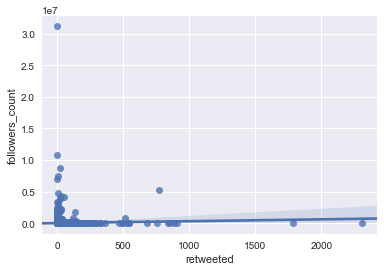

In [16]:
ax = sns.regplot(x='retweeted',y='followers_count',data=data_retweet)

In [8]:
sorted_data = data.sort_values(by='retweeted_count', ascending=False)

In [18]:
only_retweeted = sorted_data[sorted_data['retweeted_count'] > 100]

In [20]:
only_retweeted.to_csv('pre_brexit_data.csv')